In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import genfromtxt
from numpy import mean
from numpy.random import randn
import sys

these make printing nicer

In [3]:
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
X = genfromtxt('stock_prediction_data_scaled.csv', delimiter=',')
poly = PolynomialFeatures(2)
Φ = poly.fit_transform(X)

In [5]:
n = Φ.shape[0]
d = Φ.shape[1]
η = 0.0001

In [6]:
y = genfromtxt('stock_price.csv', delimiter=',')
y = np.reshape(y, (n,1))
w = randn(d,1)

The function we are trying to minimize is<br>
$$\min_w \; f(x) = \frac{1}{n} \; \sum_i^n \; (w^{\top} \phi(x_i) - y_i)^2$$

In [7]:
def f(w):
	fₒ = 0						# function output
	for ϕᵢ, yᵢ in zip(Φ,y):
		ϕᵢ = np.reshape(ϕᵢ, (d,1))		# make sure the ϕᵢ is in column format
		fₒ += (w.T.dot(ϕᵢ) - yᵢ)**2
	return ((1/n)*fₒ).item()	# this is the mse

The equation for the gradient is <br>
$$f'(x) = \frac{2}{n} \; \sum_i^n \; (w^{\top} \phi(x_i) - y_i) \phi(x_i)$$<br>
You can rewrite it into compact matrix vector form if you are good, note that $y$ is<br>
a column vector of all labels. Here we used the advanced version. <br>
Look at the linear regression version for the standard derivative version.<br>
The derivation can be found here:<br>
https://github.khoury.northeastern.edu/chieh/course_page/blob/main/4420/lecture_4/compact_regression_derivative_derivation.pdf<br>
$$f'(x) = \frac{2}{n} \Phi^{\top}(\Phi w - y)$$

In [8]:
mse_list = []
for i in range(300):
	fᑊ = Φ.T.dot(Φ.dot(w) - y)	# derivative in compact matrix form, so much easier.
	w = w - η*fᑊ				# gradient descent update w
	mse_list.append(f(w))		# record mse to plot later

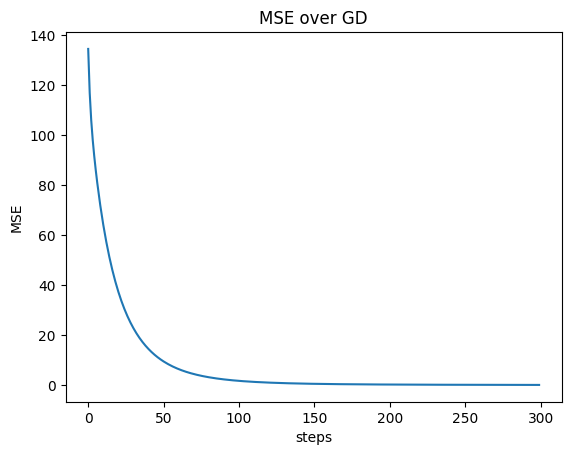

In [9]:
plt.plot(mse_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.show()

my stock price change prediction

In [10]:
ŷ = Φ.dot(w)
Y = np.hstack((ŷ, y))
print('Side by side comparison ŷ vs y') 
print(Y[0:20,:])

Side by side comparison ŷ vs y
[[ -0.4234  -0.31  ]
 [-16.607  -16.86  ]
 [  1.4947   1.36  ]
 [ 12.1279  12.75  ]
 [  7.3621   7.91  ]
 [ -3.3456  -2.75  ]
 [ -0.4491  -0.54  ]
 [-10.9339 -11.51  ]
 [ -4.5207  -4.01  ]
 [  2.9714   3.08  ]
 [ -7.9037  -8.23  ]
 [ -0.354   -0.14  ]
 [  2.4656   2.56  ]
 [ -6.9068  -6.87  ]
 [  4.4943   4.43  ]
 [  2.38     1.98  ]
 [  3.5572   3.76  ]
 [  3.9262   4.16  ]
 [  7.2559   6.67  ]
 [ -7.4632  -7.21  ]]
